# Building the Recommender System (Cosine Similarity)

### Two Classical Recommendation Methods

- **Similar people** (**Collaborative Filtering**)
    - If you like the same 5 movies as someone else, you'll likely enjoy other movies they like.
    - There are two main types: (a) Find users who are similar and recommend what they like (**user-based**), or (b) recommend items that are similar to already-liked items (**item-based**).
   

- **Similar items** (**Content-based Filtering**)
    - If you enjoy certain characteristics of movies (e.g. certain actors, genre, etc.), you'll enjoy other movies with those characteristics.
    - Note this can easily be done using machine learning methods! Each movie can be decomposed into features. Then, for each user we compute a model -- the target can be a binary classifier (e.g. "LIKE"/"DISLIKE") or regression (e.g. star rating).
    
### Types of Similarity
1. **PEARSON CORRELATION:** This method is most commonly used method. This method is used to find linear correlation between two vectors. PCC results a value between -1 and +1. -1 represents a negative corelation while +1 represents high positive correlation. 0 value shows no relation sometimes called zero order correlation. For the user-based algorithm, Pearson correlation is given in Table 1. 


2. **CONSTRAINED PEARSON CORRELATION:** Constrained Pearson correlation uses median value instead of average of rating co-rated by both users. Median value of scale is 3. For the user-based algorithm, Constrained Pearson correlation is given in Table 1.


3. **COSINE SIMILARITY:** This method is also most commonly used method in collaborative filtering in recommender systems. Cosine similarity finds how two vectors are related to each other using measuring cosine angle between these vectors. For the user-based algorithm, Cosine similarity is given in Table 1. The major drawback with cosine similarity is that it considers null preferences as negative preference.


4. **ADJUSTED COSINE SIMILARITY:** Cosine similarity measure does not consider the scenario in which different users use different rating scale. Adjusted cosine similarity solves it by subtracting the average rating provided by the user. Adjusted cosine similarity considers the difference in rating scale used by each user. Adjusted cosine similarity is slightly different from Pearson Correlation; Pearson Correlation considers the average rating of user for co-rated the items. Adjusted cosine similarity subtracts the average rating of user for all the items rated by user. For the user-based algorithm, Adjusted cosine similarity is given in Table 1.


5. **JACCARD SIMILARITY:** Jaccard similarity takes number of preferences common between two users into account. This does not consider the absolute ratings rather it considers number of items rated. Two users will be more similar, when two users have more common rated items. For the user-based algorithm, Jaccard similarity is given in Table 1. Jaccard produces limited number of values which makes the task of user distinction difficult.


6. **MEAN SQUARED DIFFERENCES:** For the user-based algorithm, MSD similarity is given in Table 1. MSD does not consider number of common rating rather it considers absolute ratings. Various similarity measures have been proposed in combination of jaccard similarity as JMSD, JPSS. Jaccard and MSD similarity can be combined to form another similarity measure method JMSD. For the user-based algorithm, JMSD similarity is given in Table 1.


7. **PIP SIMILARITY:** PIP stands for Proximity, Impact, Popularity. Proximity factor calculates the arithmetic difference between two ratings, along with consideration of agreement or disagreement of ratings, giving penalty to ratings in disagreement. Two ratings occurs in agreement if they lie on one side of the median of the rating scale. The Impact factor represents the extent to which an item is preferred or disliked by users. If two users have rated 1 on an item, it will show more strong dislike than they rate 3. Popularity is calculated around average rating of item provided by all users. Popularity gives high similarity when average of two rating far from average ratings of the item. If both users average rating has a large difference with the average of total users’ ratings, the two ratings can provide more information about the similarity of the two users. For the user-based algorithm, PIP similarity is given in Table 1. The Development of PIP was based on utilizing domain specific interpretation of user ratings on products It was developed to overcome the weakness of traditional similarity and distance measures in new user cold-start conditions. PIP performed well for new user cold-start conditions. PIP penalizes on proximity as well as Impact when there is disagreement in ratings. Sometimes it misleads about the similarity between similar users and similarity between dissimilar users. To overcome the problem faced by PIP, a new similarity measure was developed based on sigmoid function, called PSS an improved PIP measure. PSS stands for Proximity, significance, similarity. For the user-basedalgorithm, PSS similarity is given in Table 1. Proximity of two ratings is computed as in PIP. The second factor was taken as significance. Significance of two ratings was based on the median value of rating scale. It is based on the concept that the ratings, more distant from the median value, would be more significant. Singularity defines how two rating different from other ratings. PSS can be combined with Jaccard similarity measure. For the user-based algorithm, JPSS is given in Table 1.Where JPSS uses an improved version of Jaccard similarity measure.


8. **NEW HEURISTIC SIMILARITY MODEL (NHSM):** For this method, PIP has been taken as initial heuristic method. NHSM similarity measure is combination of JPSS and User Rating Preference similarity measures. User Rating Preference similarity measure is based on mean and variance of the ratings of user. For the user-based algorithm, NHSM similarity measure is given in Table 1. The value produced by NHSM ranges from 0 to 1. This similarity measure considers the fact that different users have different preferences scale and models user preference based on mean and standard variance of user ratings.


9. **SPEARMAN RANK CORRELATION:** Spearman Rank Correlation uses ranks instead of ratings for calculating similarity. For the user-based algorithm, Spearman Correlation is given in Table 1. Spearman Rank Correlation does not work well for partial orderings. Weak orderings occur whenever there are at least two items in the ranking such that neither item is preferred over the other. If there is difference between user ranking ordering and system ordering. When the system ranks same rated items at different levels, then the Spearman correlation will be penalized for every pair of items rated same by the user. Since the user shouldn’t care the system orders items that the user has rated at the same level. Kendall’s Tau metric also suffers from the same. 


10. **KENDALL’S TAU CORRELATION:** This is also rank based method to compute correlation. Kendall’s correlation considers relative ranks instead of ratings for calculating similarity. It computes the correlation of the rankings that is independent of the variable values. Kendall’s correlation suffers from the same problem faced by Spearman correlation.

Source: https://pdfs.semanticscholar.org/943a/e455fafc3d36ae4ce68f1a60ae4f85623e2a.pdf

In [81]:
# Import standard libraries
import numpy as np
import math
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from collections import Counter
from time import sleep
from datetime import datetime

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [82]:
from sklearn.model_selection import train_test_split

## 1. User Based Collaborative Filtering (Cosine Similarity)

This recommender will use product ratings for user based collaborative filtering using cosine similarity. The workflow will be as follows:

1. Take a sample from the dataset and build a small recommender system.
2. Scale that recommender system to the whole dataset.

This would fall under, **others also liked**.



### 1.1. Load in Data

In [83]:
# Read in Data
sqlite_db = 'datasets/amzn_vg_clean.db'
conn = sqlite3.connect(sqlite_db) 

query = '''
SELECT "customer_id", "product_title", "star_rating", "review_date"
FROM video_games
'''

amzn_rec_1 = pd.read_sql(query, con=conn)
print(amzn_rec_1.shape)
amzn_rec_1.head()


(26743, 4)


,customer_id,product_title,star_rating,review_date
0,52902599,Dead Space 3,3,2014-03-09
1,14437191,Dead Space 3,5,2013-05-18
2,40955995,Gears Of War - Xbox 360,5,2012-03-28
3,49783616,Gears Of War - Xbox 360,1,2009-03-11
4,52902599,Gears Of War - Xbox 360,3,2008-03-02


In [84]:
amzn_rec_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26743 entries, 0 to 26742
Data columns (total 4 columns):
customer_id      26743 non-null int64
product_title    26743 non-null object
star_rating      26743 non-null int64
review_date      26743 non-null object
dtypes: int64(2), object(2)
memory usage: 835.8+ KB


In [85]:
print(len(amzn_rec_1['customer_id'].unique()))
print(len(amzn_rec_1['product_title'].unique()))

943
3665


In [86]:
# Read in trainset
sqlite_db = 'datasets/amzn_vg_clean.db'
conn = sqlite3.connect(sqlite_db) 

train_query = '''
SELECT "customer_id", "product_title", "star_rating"
FROM trainset
'''
test_query = '''
SELECT "customer_id", "product_title", "star_rating"
FROM testset
'''

trainset = pd.read_sql(train_query, con=conn)
testset = pd.read_sql(test_query, con=conn)
print(trainset.shape)
print(testset.shape)


(39838, 3)
(5814, 3)


In [87]:
# Utility Matrix
train_utilmat = trainset.groupby(['customer_id','product_title'])['star_rating'].mean().unstack()
print(train_utilmat.shape)

(1645, 4284)


In [88]:
# Mean center utility matrix for cosine similarities 
mc_utilmat = train_utilmat.apply(lambda x: x - np.mean(x), axis=1).fillna(0)
print(train_utilmat.shape)
mc_utilmat.head()

(1645, 4284)


product_title,007 Legends,007 The World Is Not Enough PS,007 The World is Not Enough,10 Minute Solution,100 All-Time Favorites - Nintendo DS,100 Classic Books - Nintendo DS,1001 Touch Games - Nintendo DS,101-in-1 Explosive Megamix - Nintendo DS,1080 Snowboarding,1080° Avalanche,...,Zumba Fitness World Party,angry birds,bleem! - PC,dreamGEAR TriMount,iCarly - Nintendo DS,inFAMOUS - Playstation 3,inFAMOUS 2,inFAMOUS Collection - Playstation 3,miCoach by Adidas,rFactor V. 1.255 - PC
customer_id,,,,,,,,,,,,,,,,,,,,,
11049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2447710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2632849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# Fill original utility matrix with 0s
train_utilmat.fillna(0, inplace=True)

In [90]:
# See most popular products
amzn_rec_1.groupby('product_title')['star_rating'].agg(['count','mean']).sort_values(by='count', ascending=False)

,count,mean
product_title,,
The Last of Us,158,4.455696
Assassin's Creed 4,132,4.325758
Grand Theft Auto V,129,4.333333
Call of Duty: Ghosts,120,3.558333
Grand Theft Auto IV,108,4.018519
Tomb Raider,106,4.584906
Elder Scrolls V: Skyrim,105,4.285714
Mass Effect 3,94,3.957447
Call of Duty 4: Modern Warfare,90,4.477778


**Make Similarity Matrix**

In [91]:
# from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics import pairwise_distances

# Calculate the pairwise distances of users and items using cosine similarity
user_similarity = 1 - pairwise_distances(train_utilmat, metric='cosine')
prod_similarity = 1 - pairwise_distances(train_utilmat.T, metric='cosine')

print(user_similarity.shape)
print(prod_similarity.shape)


(1645, 1645)
(4284, 4284)


In [92]:
cosim_user = pd.DataFrame(user_similarity, index=train_utilmat.index, columns=train_utilmat.index)
cosim_user.head()


customer_id,11049,86525,100864,2447710,2632849,4208734,4717628,4979793,5066242,5356264,...,53051790,53057697,53058097,53064642,53067883,53079341,53081008,53081825,53082946,53084547
customer_id,,,,,,,,,,,,,,,,,,,,,
11049,1.0,0.000000,0.0,0.0,0.000000,0.125988,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.053030,0.00000,0.0,0.106990,0.000000,0.0,0.0
86525,0.0,1.000000,0.0,0.0,0.076143,0.000000,0.0,0.102585,0.0,0.0,...,0.0,0.0,0.0,0.024173,0.02641,0.0,0.000000,0.046047,0.0,0.0
100864,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0
2447710,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.283069,0.000000,0.0,0.0
2632849,0.0,0.076143,0.0,0.0,1.000000,0.000000,0.0,0.187120,0.0,0.0,...,0.0,0.0,0.0,0.039684,0.00000,0.0,0.000000,0.000000,0.0,0.0


In [94]:
cosim_prod = pd.DataFrame(prod_similarity, index=train_utilmat.columns, columns=train_utilmat.columns)
cosim_prod.head()


product_title,007 Legends,007 The World Is Not Enough PS,007 The World is Not Enough,10 Minute Solution,100 All-Time Favorites - Nintendo DS,100 Classic Books - Nintendo DS,1001 Touch Games - Nintendo DS,101-in-1 Explosive Megamix - Nintendo DS,1080 Snowboarding,1080° Avalanche,...,Zumba Fitness World Party,angry birds,bleem! - PC,dreamGEAR TriMount,iCarly - Nintendo DS,inFAMOUS - Playstation 3,inFAMOUS 2,inFAMOUS Collection - Playstation 3,miCoach by Adidas,rFactor V. 1.255 - PC
product_title,,,,,,,,,,,,,,,,,,,,,
007 Legends,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
007 The World Is Not Enough PS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
007 The World is Not Enough,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.143444,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
10 Minute Solution,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.550482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632456,0.0
100 All-Time Favorites - Nintendo DS,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### 1.2. Recommender Functions - Similar Users (with K-Neighbors)


We will be using a KNN basic algorithm to compute predictions based on user similarity.

$${\large \hat{r}_{ui} = \frac{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)} }$$

Where:<br>
$\hat{r}_{ui}$ - predictions for user $u$ and item $i$<br>
$v \in N^k_i(u)$ - $v$ similar users in neighborhood $k$<br>
$\text{sim}(u, v)$ - similarity between users $v$ and $u$<br>
$r_{vi}$ - rating of item $i$ for user $v$<br>


In [120]:
def get_rating(utilmat, user_sim, user, item, k=2, option='average'):
    '''
    Function that predicts the rating given a user and an item.
    
    Arguments:
    - utilmat   :  utility matrix with dimensions |users| x |items|
    - user_sim  :  cosine similarity matrix between users
    - user      :  target user
    - item      :  target item
    - k         :  k-nearest neighbors based on cosine similarity
    
    Returns:
    - prediction : predicted rating for target user and item
    '''
    # Mean user rating
    user_vect = utilmat.loc[user].values.astype(int)
    mean_u_rating = np.mean(user_vect[user_vect!=0])
    
    if option == 'average':
        # Nearest ratings
        nrst_users = user_sim[user].sort_values(by=user, ascending=False)[1:k+1].index.values
        nrst_ratings = utilmat.loc[nrst_users][item].values
        sub_pred = np.mean(nrst_ratings)
        if sub_pred < 1:
            sub_pred = mean_u_rating

        prediction = sub_pred
    
    elif option == 'wt_average':
        # Nearest ratings, cosine similarities
        nrst_users = user_sim[user].sort_values(by=user, ascending=False)[1:k+1].index.values
        nrst_ratings = utilmat.loc[nrst_users][item].values
        nrst_cosims = user_sim[user].sort_values(by=user, ascending=False)[1:k+1].values
        try:
            sub_pred = np.sum(np.dot(nrst_ratings, nrst_cosims))/np.sum(nrst_cosims)
        except:
            sub_pred = 0
        
        prediction = mean_u_rating + sub_pred
    
    return prediction

In [121]:
get_rating(train_utilmat, cosim_user, [22421893], 'The Last of Us', k=2, option='average')

5.0

In [122]:
def predict_all(dataset, utilmat, similarity, k=2, option='average'):
    '''
    A function that returns a list of all predictions.
    Only makes predictions for user-item pairs with true ratings.
    '''
    dataset['predictions'] = dataset.apply(lambda x: get_rating(utilmat, 
                                                                similarity, 
                                                                [x['customer_id']], 
                                                                x['product_title'], 
                                                                k=k,
                                                                option=option), axis=1)
#     predictions = []
    
#     for user in utilmat.index:
#         for item in utilmat.columns:
#             if utilmat.loc[user, str(item)] == 0.:
#                 continue
#             pred = get_rating(utilmat, similarity, [user], item, k=k, option=option)
#             if math.isnan(pred):
#                 predictions.append(0)
#             else:
#                 predictions.append(pred)
    
    return dataset
    

In [123]:
predict_all(testset, train_utilmat, cosim_user, k=2, option='average')

,customer_id,product_title,star_rating,predictions
0,52902599,Dead Space 3,3,3.060606
1,47076390,Call of Duty 4: Modern Warfare,4,3.500000
2,14437191,Battlefield 3,5,3.000000
3,18201192,Batman: Arkham Asylum,3,2.583333
4,32499971,Batman: Arkham Asylum,5,5.000000
5,16263815,Call of Duty: Black Ops,4,3.695652
6,24206771,Mortal Kombat Komplete Edition - PC,5,2.000000
7,19314428,Aliens: Colonial Marines,5,2.000000
8,50820219,Aliens: Colonial Marines,1,3.833333
9,19304891,Aliens: Colonial Marines,3,3.466667


In [126]:
def recommend(new_ratings, dataset, k=2, option='average'):
    '''
    Function that gets recommendation for a new customer.
    
    Arguments:
    - new_ratings   : dictionary of new customer's items and ratings
    - utilmat       : utility matrix
    
    Returns:
    - predictions  :  recommendations given by algorithm
    '''
    # Append new customer to data
    new_data = pd.DataFrame({'customer_id':[1]*len(new_ratings), 
                             'product_title':new_ratings, 
                             'star_rating':[5]*len(new_ratings)})
    full_data = pd.concat([new_data, dataset]).reset_index(drop=True)
    
    # Make new utility matrix
    utilmat = full_data.groupby(['customer_id','product_title'])['star_rating'].mean().unstack()
    
    # Mean center utility matrix for cosine similarities 
    mc_utilmat = utilmat.apply(lambda x: x - np.mean(x), axis=1).fillna(0)

    # Fill original utility matrix with 0s
    utilmat.fillna(0, inplace=True)
    
    # New cosine similarity matrix
    user_sim = 1 - pairwise_distances(utilmat, metric='cosine')
    user_sim = pd.DataFrame(user_sim, index=utilmat.index, columns=utilmat.index)
    
    pred_list = []
    for item in utilmat.columns:
        preds = get_rating(utilmat, user_sim, [1], item, k=k, option=option)
        pred_list.append(preds)
        
    predictions = pd.DataFrame(pred_list, 
                               index=utilmat.columns, 
                               columns=['predicted_ratings']).sort_values(by='predicted_ratings', ascending=False)
    
    for item in predictions.index:
        if item in new_ratings:
            predictions.drop(item, inplace=True)
    
    print('\nBased on your preferences:\n', new_ratings, '\nWe Suggest:')

    return predictions.head(15)

In [127]:
# Make recommendations
new_ratings = ['The Last of Us',
                'Grand Theft Auto V', 
                'Call of Duty: Ghosts', 
                'Battlefield 4',
                'Grand Theft Auto IV']

recommend(new_ratings, trainset, k=2, option='average')



Based on your preferences:
 ['The Last of Us', 'Grand Theft Auto V', 'Call of Duty: Ghosts', 'Battlefield 4', 'Grand Theft Auto IV'] 
We Suggest:


,predicted_ratings
product_title,
007 Legends,5.0
Rise Of Nations: Rise of Legends - PC,5.0
Richard Burns Rally,5.0
Richard Garriott's Tabula Rasa,5.0
Riddick: Assault on Dark Athena,5.0
Riddle of the Sphinx - PC,5.0
Ride to Hell Retribution,5.0
Ridge Racer - Sony PSP,5.0
Ridge Racer 3D - Nintendo 3DS,5.0


### 1.3. Predict Ratings and Score Model

In [147]:
def rmse(predictions_df):
    '''
    A function that computes total root mean squared error.
    Only scores the model on user-item pairs with true ratings.
    '''
    predictions_df['squared error'] = (predictions_df['predictions'] - predictions_df['star_rating'])**2
    root_mse = np.sqrt(np.mean(predictions_df['squared error']))
    
#     xs, ys = true.nonzero()
#     error = []
#     for x, y, preds in zip(xs, ys, predictions):
#         error.append((true[x, y] - preds)**2)
#         print('true: ', true[x, y])
#         print('pred: ', preds)
#         print()

    return predictions_df, root_mse
    

In [140]:
test_predictions = predict_all(testset, train_utilmat, cosim_user, k=2, option='average')

rmse_df, rmse = rmse(test_predictions)

In [141]:
rmse

1.2144047535175424

In [142]:
rmse_df

,customer_id,product_title,star_rating,predictions,squared error
0,52902599,Dead Space 3,3,3.060606,0.003673
1,47076390,Call of Duty 4: Modern Warfare,4,3.500000,0.250000
2,14437191,Battlefield 3,5,3.000000,4.000000
3,18201192,Batman: Arkham Asylum,3,2.583333,0.173611
4,32499971,Batman: Arkham Asylum,5,5.000000,0.000000
5,16263815,Call of Duty: Black Ops,4,3.695652,0.092628
6,24206771,Mortal Kombat Komplete Edition - PC,5,2.000000,9.000000
7,19314428,Aliens: Colonial Marines,5,2.000000,9.000000
8,50820219,Aliens: Colonial Marines,1,3.833333,8.027778
9,19304891,Aliens: Colonial Marines,3,3.466667,0.217778


### 1.5. Trying Different Vlaues of K (WARNING: Long Runtime)

In [150]:
def plot_rmse(k_range, testset, train_utilmat, cosim_user, option='average'):
    '''
    Function which takes in a range of K nearest neighbors values.
    Calculates the RMSE on train and test for each K and plots this.
    '''
    scores_dict = {'k': [], 'test_rmse': []}
    
    for k in k_range:
        test_predictions = predict_all(testset, train_utilmat, cosim_user, k=k, option=option)

        test_rmse = rmse(test_predictions)[1]
        
        scores_dict['k'].append(k)
        scores_dict['test_rmse'].append(test_rmse)
        print('k={} done'.format(k))
    
    scores_df = pd.DataFrame(scores_dict)
    
    plt.figure(figsize=(10,7));
    plt.plot(scores_df['k'], scores_df['test_rmse'], label='test_rmse');
    plt.title('RMSE for Different Values of K', fontsize=15);
    plt.xlabel('K');
    plt.ylabel('RMSE');
    plt.legend()
    
    return scores_df
        

k=2 done
k=3 done
k=4 done
k=5 done
k=6 done
k=7 done
k=8 done
k=9 done
k=10 done


,k,test_rmse
0,2,1.214405
1,3,1.360696
2,4,1.471780
3,5,1.477328
4,6,1.232387
5,7,1.275979
6,8,1.323639
7,9,1.341986
8,10,1.304025


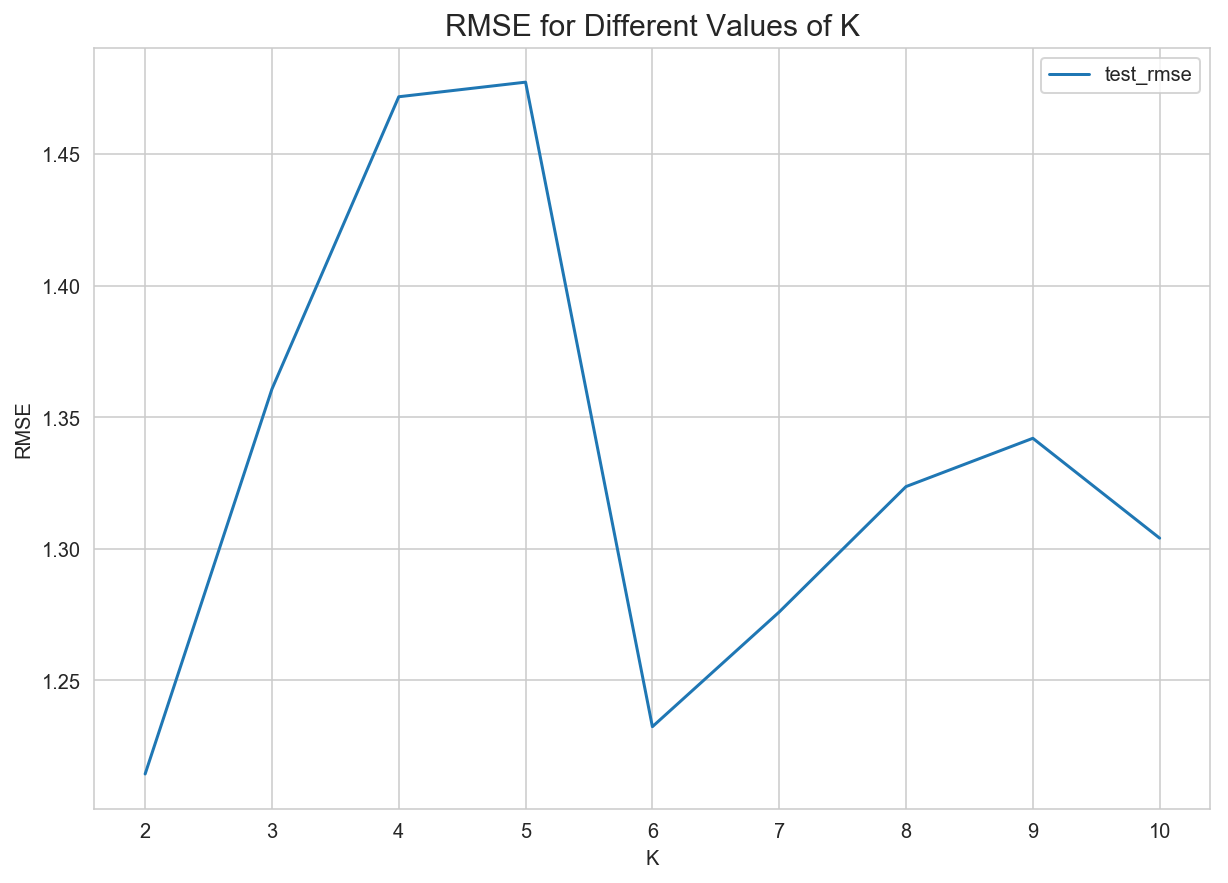

In [151]:
plot_rmse(range(2,11), testset, train_utilmat, cosim_user, option='average')

In [ ]:
# Best K is 2

## 2. Item-Item


### 2.1 Item-Item (KNN basic)

$${\large \hat{r}_{ui} = \frac{\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j) \cdot r_{uj}}{\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j)} }$$

Where:<br>
$\hat{r}_{ui}$ - predictions for user $u$ and item $i$<br>
$j \in N^k_u(i)$ - $j$ similar items in neighborhood $k$<br>
$\text{sim}(i, j)$ - similarity between items $i$ and $j$<br>
$r_{uj}$ - rating of item $j$ for user $u$<br>


In [ ]:
# Item - User utility matrix
utilmat = ratings_df.T
utilmat.head(3)


In [ ]:
def get_ii_rating(utilmat, item_sim, item, user, k=2):
    '''
    Function that predicts the rating given a user and an item.
    
    Arguments:
    - utilmat   :  utility matrix with dimensions |items| x |users|
    - item_sim  :  cosine similarity matrix between users
    - user      :  target user
    - item      :  target item
    - k         :  k-nearest neighbors based on cosine similarity
    '''
    # Mean item rating
    item_vect = utilmat.loc[item].values.astype(int)
    mean_item_rating = np.mean(item_vect[item_vect!=0])
    
    nrst_items = item_sim[item].sort_values(ascending=False)[1:k+1].index.values
    nrst_ratings = utilmat.loc[nrst_items][user].values
    nrst_cosims = item_sim[item].sort_values(ascending=False)[1:k+1].values
    
    try:
        prediction = np.sum(np.dot(nrst_ratings, nrst_cosims))/np.sum(nrst_cosims)
    except:
        prediction = mean_item_rating
    
    if prediction < 1:
        prediction = mean_item_rating
    
    return prediction


### 2.2. Predict and Score

In [ ]:
def ii_predict(utilmat, similarity, k=2):
    '''
    A function that returns a list of all predictions.
    Only makes predictions for user-item pairs with true ratings.
    '''
    predictions = []
    
    for item in utilmat.index:
        for user in utilmat.columns:
            if utilmat.loc[item, user] == 0.:
                continue
            pred = get_ii_rating(utilmat, similarity, item, user, k=k)
            if math.isnan(pred):
                predictions.append(0)
            else:
                predictions.append(pred)
            if len(predictions) % 1000 == 0:
                print('{} predictions made'.format(len(predictions)))
    
    return predictions
    

In [ ]:
def rmse(true, predictions):
    '''
    A function that computes total root mean squared error.
    Only scores the model on user-item pairs with true ratings.
    '''
    xs, ys = true.nonzero()
    error = []
    for x, y, preds in zip(xs, ys, predictions):
        error.append((true[x, y] - preds)**2)
        print('true: ', true[x, y])
        print('pred: ', preds)
        print()
    return np.sqrt(np.mean(error))
    

In [ ]:
from sklearn.metrics import confusion_matrix

def confusion(true, predictions):
    '''
    A function that will produce a confusion matrix.
    '''
    xs, ys = true.nonzero()
    true_values = [true[x, y] for x, y in zip(xs, ys)]
    df = pd.DataFrame({'true': true_values, 'pred':predictions})
    df['true_good'] = df['true'].apply(lambda x: 1 if x>=4 else 0)
    df['pred_good'] = df['pred'].apply(lambda x: 1 if x>=4 else 0)
    
    conf_mat = pd.DataFrame(np.array(confusion_matrix(df['true_good'], df['pred_good'])),
                                                      index=['is_bad', 'is_good'],
                                                      columns=['pred_bad','pred_good'])
    
    return conf_mat, df

In [ ]:
utilmat = ratings_df.T
item_sim = cosim_prod
user = 1660356
item = 'The Last of Us'

# Actual
print(utilmat[1660356]['The Last of Us'])
# Prediction
print(get_ii_rating(utilmat, item_sim, item, user, k=2))

In [ ]:
# k = 2
predictions2 = ii_predict(utilmat, item_sim, k=2)
rmse(utilmat.values, predictions2)

In [ ]:
# Confusion matrix
confmat = confusion(utilmat.values, predictions2)[0]
confmat

In [ ]:
df = confusion(utilmat.values, predictions2)[1]
df

In [ ]:
true_good = df['true_good']
pred_good = df['pred_good']

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(true_good, pred_good))
print(metrics.recall_score(true_good, pred_good))
print(metrics.precision_score(true_good, pred_good))
print(metrics.classification_report(true_good, pred_good))

**K = 5**

In [ ]:
# k = 5
predictions5 = ii_predict(utilmat, item_sim, k=5)
rmse(utilmat.values, predictions5)

In [ ]:
# Confusion matrix
confmat = confusion(utilmat.values, predictions5)[0]
confmat

In [ ]:
df = confusion(utilmat.values, predictions5)[1]
true_good = df['true_good']
pred_good = df['pred_good']

print(metrics.accuracy_score(true_good, pred_good))
print(metrics.recall_score(true_good, pred_good))
print(metrics.precision_score(true_good, pred_good))
print(metrics.classification_report(true_good, pred_good))

**K = 10**

In [ ]:
# k = 10
predictions10 = ii_predict(utilmat, item_sim, k=10)
rmse(utilmat.values, predictions10)


In [ ]:
# Confusion matrix
confmat = confusion(utilmat.values, predictions10)[0]
confmat

In [ ]:
df = confusion(utilmat.values, predictions10)[1]
true_good = df['true_good']
pred_good = df['pred_good']

print(metrics.accuracy_score(true_good, pred_good))
print(metrics.recall_score(true_good, pred_good))
print(metrics.precision_score(true_good, pred_good))
print(metrics.classification_report(true_good, pred_good))

**K = 20**

In [ ]:
# k = 20
predictions20 = ii_predict(utilmat, item_sim, k=20)
rmse(utilmat.values, predictions20)


In [ ]:
# Confusion matrix
confmat = confusion(utilmat.values, predictions20)[0]
confmat

In [ ]:
df = confusion(utilmat.values, predictions20)[1]
true_good = df['true_good']
pred_good = df['pred_good']

print(metrics.accuracy_score(true_good, pred_good))
print(metrics.recall_score(true_good, pred_good))
print(metrics.precision_score(true_good, pred_good))
print(metrics.classification_report(true_good, pred_good))

**K = 50**

In [ ]:
# k = 50
predictions50 = ii_predict(utilmat, item_sim, k=50)
rmse(utilmat.values, predictions50)

In [ ]:
# Confusion matrix
confmat = confusion(utilmat.values, predictions50)[0]
confmat

In [ ]:
df = confusion(utilmat.values, predictions50)[1]
true_good = df['true_good']
pred_good = df['pred_good']

print(metrics.accuracy_score(true_good, pred_good))
print(metrics.recall_score(true_good, pred_good))
print(metrics.precision_score(true_good, pred_good))
print(metrics.classification_report(true_good, pred_good))

### 2.3. Item-Item (KNN with Means)

Baseline estimate for user $u$ and item $i$:

$${\large b_{ui} = \mu + b_{u} + b_{i} }$$

$b_{ui}$ - Baseline estimate for user $u$ and item $i$<br>
$\mu$ - Mean rating accross all users and items<br>
$b_{u}$ - Rating deviation for user $u$ from $\mu$ (user $u$'s bias)<br>
$b_{i}$ - Rating deviation for item $i$ from $\mu$ (item $i$'s bias)<br>

Prediction for user $u$ and item $i$:

$${\large p_{u,i} = b_{u,i} + \frac{\sum_{j\in K}{(r_{u,j} - b_{u,j}) \cdot w_{i,j}}}{\sum_{j\in K}{w_{i,j}}} }$$

$p_{u,i}$ - Prediction for user $u$ and item $i$<br>
$b_{u,i}$ - Baseline estimate for user $u$ and item $i$<br>
$r_{u,j}$ - Rating for user $u$ and item $j$ for ${j\in K}$ neighborhood of $K$ similar items<br>
$b_{u,j}$ - Baseline estimate for user $u$ and item $j$<br>
$(r_{u,j} - b_{u,j})$ - Deviation of rating for item $j$<br>
$w_{i,j}$ - Similarity between items $i$ and $j$<br>



In [ ]:
def global_baseline(utilmat, item, user):
    # Mean item rating
    item_vect = utilmat.loc[item].values.astype(int)
    mean_item_rating = np.mean(item_vect[item_vect!=0])
    
    # Mean user rating
    user_vect = utilmat[user].values.astype(int)
    mean_user_rating = np.mean(user_vect[user_vect!=0])
    
    # Global baseline estimate for target user and item
    mu = np.mean(np.mean(utilmat[utilmat!=0])) 
    bu = mean_user_rating - mu
    bi = mean_item_rating - mu
    
    bui = mu + bu + bi
    
    return bui

In [ ]:
utilmat.head(3)

In [ ]:
global_baseline(utilmat, ['The Last of Us', 'Grand Theft Auto V'], 1660356)

In [ ]:
def get_ui_rating(utilmat, item_sim, item, user, k=2):
    '''
    Function that predicts the rating given a user and an item.
    Uses a hybrid method of global baseline and item-item collaborative filtering.
    
    Arguments:
    - utilmat   :  utility matrix with dimensions |items| x |users|
    - item_sim  :  cosine similarity matrix between items
    - user      :  target user
    - item      :  target item
    - k         :  k-nearest neighbors based on cosine similarity
    '''
    # Global baseline for target item and user
    bui = global_baseline(utilmat, item, user)
    
    # Nearest items
    nrst_items = item_sim[item].sort_values(ascending=False)[1:k+1].index.values
    nrst_ratings = utilmat.loc[nrst_items][user].values
    nrst_cosims = item_sim[item].sort_values(ascending=False)[1:k+1].values
#     nrst_bui = global_baseline(utilmat, nrst_items, user)
    
    try:
        prediction = bui + (np.sum(np.dot((nrst_ratings - bui), nrst_cosims)) / np.sum(nrst_cosims))
    except:
        prediction = bui
    
    if prediction < 1:
        prediction = bui
        
    return prediction

In [ ]:
def ui_predict(utilmat, similarity, k=2):
    '''
    A function that returns a list of all predictions.
    Only makes predictions for user-item pairs with true ratings.
    '''
    predictions = []
    
    xs, ys = utilmat.values.nonzero()
    total_preds = len(xs)
    count = 0
    
    for item in utilmat.index:
        for user in utilmat.columns:
            if utilmat.loc[item, user] == 0.:
                continue
            pred = get_ui_rating(utilmat, similarity, item, user, k=k)
            if math.isnan(pred):
                predictions.append(0)
            else:
                predictions.append(pred)
            
            count +=1
            if count % 1000 == 0:
                print('predictions: {}/{}'.format(count, total_preds))
    
    return predictions
    

In [ ]:
def rmse(true, predictions):
    '''
    A function that computes total root mean squared error.
    Only scores the model on user-item pairs with true ratings.
    '''
    xs, ys = true.nonzero()
    error = []
    for x, y, preds in zip(xs, ys, predictions):
        error.append((true[x, y] - preds)**2)
        print('true: ', true[x, y], 'pred: ', preds)
        print()
    return np.sqrt(np.mean(error))
    

In [ ]:
utilmat = ratings_df.T
item_sim = cosim_prod
user = 1660356
item = 'The Last of Us'

# Actual
print(utilmat[1660356]['The Last of Us'])
# Prediction
print(get_ui_rating(utilmat, item_sim, item, user, k=2))

In [ ]:
len(utilmat.values.nonzero()[0])

In [ ]:
# k = 2
predictions = ui_predict(utilmat, item_sim, k=2)
rmse(utilmat.values, predictions)

In [ ]:
# ------
interrupt


### ----- CONSIDER CUTTING -----
### 1.5. Recommender Functions (without K-Neighbors)

Predictions for similar users **(with k-neighbors)**:
<img src="docs/cosine_predictions.png" style="width: 400px;"/>

$p_{a,i}$ - the prediction for active user $a$ for item $i$<br/>
$w_{a,u}$ - the similarity between users $a$ and $u$<br/>
$K$ - the neighborhood of most similar users.

Predictions for similar items:
<img src="docs/cos_item_pred.png" style="width: 350px;"/>

$K$ - the neighborhood of most similar items rated by active user $a$<br/>
$w_{i,j}$ - the similarity between items $i$ and $j$



Equation without k-neighbors:

$$ P_{a,i} = \overline{r}_{a} + \frac{\sum{(r_{a,i} - \overline{r}_{u})} \times w_{a,u}}{\sum{w_{a,u}}} $$

<br>

$$ P = \overline{R} + \frac{(R - \overline{R}) \times W}{W} $$

**FIGURE THIS OUT**


In [ ]:
def predict_ratings(ratings_df, sim_type='user'):
    '''
    Function that will predict ratings of users. 
    
    Arguments:
    - ratings_df     : Dataframe of ratings
    - similarity_df  : Cosine similarity dataframe based on sim_type
    - sim_type       : Either similarity of 'users' or 'items'
    '''
    if sim_type == 'user':
        # User similarity matrix
        user_similarity = cosine_similarity(ratings_df)
        
        # Mean rating for each user
        mean_user_rating = ratings_df.mean(axis=1).values.reshape(-1,1)

        # We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings_df - mean_user_rating)

        # Make predictions
#         pred = mean_user_rating + user_similarity.dot(ratings_diff) / np.abs(user_similarity).sum(axis=1).reshape(-1,1)
        
        pred = user_similarity.dot(ratings_diff) / np.abs(user_similarity).sum(axis=1).reshape(-1,1)
    
    elif sim_type == 'item':
        # Product similarity matrix
        prod_similarity = cosine_similarity(ratings_df.T)
        
        # Make predictions
        pred = ratings_df.dot(prod_similarity) / np.abs(prod_similarity).sum(axis=1)
        
    return pred

In [ ]:
# Make predictions based on user and item similarity separately
user_preds = predict_ratings(ratings_df, sim_type='user')
prod_preds = predict_ratings(ratings_df, sim_type='item')
print(user_preds.shape)
print(prod_preds.shape)

In [ ]:
user_preds_df = pd.DataFrame(user_preds, index=ratings_df.index, columns=ratings_df.columns)
user_preds_df.head()

In [ ]:
prod_preds.columns = ratings_df.columns
prod_preds.head()


### 1.6. Score Model

In [ ]:
def mse(true, preds):
    '''
    A function that computes total root mean squared error.
    '''
    xs, ys = true.nonzero()
    error = []
    for x, y in zip(xs, ys):
        error.append((true[x, y] - preds[x, y])**2)
    return np.sqrt(np.mean(error))


In [ ]:
user_score = mse(ratings_df.values, user_preds_df.values)
prod_score = mse(ratings_df.values, prod_preds.values)

print(user_score)
print(prod_score)


### 1.7. Make Recommendations for New Customer

In [ ]:
def recommend(new_ratings, utilmat, sim_type='user'):
    '''
    Function that gets recommendation for a new customer.
    
    Arguments:
    - new_ratings   : Dictionary of new customer's items and ratings
    - utilmat       : Utility matrix
    '''
    # Add new customer to utility matrix
    new_customer = pd.DataFrame([new_ratings], columns=utilmat.columns).fillna(0)
    new_utilmat = pd.concat([new_customer, utilmat])
    
    if sim_type == 'user':
        # Make predictions
        preds = pd.DataFrame(predict_ratings(new_utilmat, sim_type=sim_type), 
                             index=new_utilmat.index, 
                             columns=new_utilmat.columns)
    elif sim_type == 'item':
        # Make predictions
        preds = predict_ratings(new_utilmat, sim_type='item')
        preds.columns = new_utilmat.columns
    
    preds = preds.loc[0].sort_values(ascending=False)
    
    for item in preds.index:
        if item in new_ratings:
            preds.drop(item, inplace=True)
    
    print('\nBased on your preferences:\n', new_ratings, '\nWe Suggest:')

    return preds.head(15)
    

In [ ]:
# Count how many times each product appears in the entire dataset
prod_freq_sample = Counter([prod for prod in amzn_rec_1['product_title'].values])
sorted(prod_freq_sample.items(), key=lambda x: x[1], reverse=True)[:20]


In [ ]:
# Make recommendations
new_ratings = {'The Last of Us': 5,
                'Grand Theft Auto V': 5, 
                'Call of Duty: Ghosts': 5, 
                'Battlefield 4': 5,
                'Grand Theft Auto IV': 5}

recommend(new_ratings, ratings_df, sim_type='user')


In [ ]:
# Make recommendations
new_ratings = {'The Last of Us': 5,
                'Grand Theft Auto V': 5, 
                'Call of Duty: Ghosts': 5, 
                'Battlefield 4': 5,
                'Grand Theft Auto IV': 5}

recommend(new_ratings, ratings_df, sim_type='item')


In [ ]:
# -----------
interrupt
# -----------

## 2. Item-Item Collaborative Filtering

In [ ]:
# Count how many times each product appears in the entire dataset
prod_freq_sample = Counter([prod for prod in amzn_rec_1['product_title'].values])
sorted(prod_freq_sample.items(), key=lambda x: x[1], reverse=True)[:10]


In [ ]:
ratings_df.head(2)


In [ ]:
prod_similarity = cosine_similarity(ratings_df.T)
print(prod_similarity.shape)


In [ ]:
cosim_prod = pd.DataFrame(prod_similarity, index=ratings_df.columns, columns=ratings_df.columns)
cosim_prod.head(2)


## 2.1.  Recommender Functions

In [ ]:
def item_cf_cos_recs(product_set, coocc):
    '''
    Function that takes in product set and co-occurence matrix.
    Returns weighted sum of jaccard similarities and sorts in descending order
    '''
    recs = coocc[product_set].apply(lambda x: sum(x)/len(product_set), axis=1).sort_values(ascending=False)
        
    return recs

In [ ]:
def item_cf_cos_prompt(coocc, prod_freq):
    '''
    Function that prompts the user for products to select.
    Products will be put into a set which will be used to get recommendations based on jaccard similarity of products.
    '''
    print('Please choose one or more of the following:\n')
    sleep(1)
    
    # Avaliable games for user
    top_suggestions = [i[0] for i in sorted(prod_freq.items(), key=lambda x: x[1], reverse=True)][:20]    
    for ind, prod in enumerate(top_suggestions):
        print(str(ind+1)+'. ', prod)
    
    # Product set - Stop prompt when user inputs 'Done'
    product_set = []
    print('\nIf you are done, type "Done".')
    not_done = True
    while not_done == True:
        prompt = input('Type in your selection here: ')
        if prompt != 'Done':
            product_set.append(prompt)
        else:
            not_done = False
    
    # Get recommendations
    recs = item_cf_cos_recs(product_set, coocc).drop(index=product_set)
    
    # Print user's selections
    print('\nBased on your selections:')
    for ind, prod in enumerate(product_set):
        print(str(ind+1)+'. ', prod)
    
    # Print top recommendations
    print('\nWe suggest:')
    top5 = [rec for rec in recs[0:5].index]
    for ind, rec in enumerate(top5):
        print(str(ind+1)+'. ', rec)
    
    return recs

In [ ]:
# One game
one_prod = item_cf_cos_prompt(cosim_prod, prod_freq_sample)


In [ ]:
one_prod.head(15)


In [ ]:
# Five game
five_prod = item_cf_cos_prompt(cosim_prod, prod_freq_sample)


## 2.2. Cosolidating the Functions

In [ ]:
class CS():
    
    def __init__(self, cosim_mat, prod_freq):
        '''
        Class uses cosine similarity between products based on how users have rated them. 
        
        Arguments:
        - cosim_mat : cosine similarity matrix
        - prod_freq : counter object of product frequency
        '''
        self.cosim_mat = cosim_mat
        self.prod_freq = prod_freq
    
    
    def item_cf_cos_recs(self, prod_set):
        '''
        Function that takes in product set and co-occurence matrix.
        Returns weighted sum of jaccard similarities and sorts in descending order
        '''
        recs = self.cosim_mat[prod_set].apply(lambda x: sum(x)/len(prod_set), axis=1).sort_values(ascending=False)
        return recs

    
    def item_cf_cos_prompt(self):
        '''
        Function that will return recommendations based on cosine similarity.
        - Prompt user to choose products from list.
        - Return recommendations based on cosine similarity.
        '''
        print('Please choose one or more of the following:\n')
        sleep(1)

        # Avaliable games for user
        top_suggestions = [i[0] for i in sorted(self.prod_freq.items(), key=lambda x: x[1], reverse=True)][:20]    
        for ind, prod in enumerate(top_suggestions):
            print(str(ind+1)+'. ', prod)

        # Product set - Stop prompt when user inputs 'Done'
        prod_set = []
        print('\nIf you are done, type "Done".')
        not_done = True
        while not_done == True:
            prompt = input('Type in your selection here: ')
            if prompt != 'Done':
                prod_set.append(prompt)
            else:
                not_done = False

        # Get recommendations
        recs = self.item_cf_cos_recs(prod_set).drop(index=prod_set)

        # Print user's selections and top recommendations
        print('\nBased on your selections:')
        for ind, prod in enumerate(prod_set):
            print(str(ind+1)+'. ', prod)
        print('\nWe suggest:')
        top10 = [rec for rec in recs[0:10].index]
        for ind, rec in enumerate(top10):
            print(str(ind+1)+'. ', rec)

        return recs

In [ ]:
# Define prod_freq
prod_freq_sample = Counter([prod for prod in amzn_rec_1['product_title'].values])
sorted(prod_freq_sample.items(), key=lambda x: x[1], reverse=True)[:10]


In [ ]:
# Define cosine similarity matrix between products
# prod_similarity = cosine_similarity(mc_df.T)
prod_similarity = cosine_similarity(ratings_df.T)

cosim_prod = pd.DataFrame(prod_similarity, index=mc_df.columns, columns=mc_df.columns)
cosim_prod.head(2)


In [ ]:
cosine_recommender = CS(cosim_prod, prod_freq_sample)


In [ ]:
recos = cosine_recommender.item_cf_cos_prompt()


In [ ]:
full_recs = pd.DataFrame(recos, columns=['Score']).head(20)


In [ ]:
full_recs.reset_index()
